In [9]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
# Load each dataset
data1 = pd.read_csv("file1.csv")
data2 = pd.read_csv("file2.csv", sep="\t")
data3 = pd.read_csv("file3.csv")

# Perform cleaning for each dataset
data1 = data1.dropna() 
data2 = data2.fillna(data2.mean())  
data3 = data3.drop_duplicates()  


In [22]:
print(data1.head())
print(data1.columns)

print(data2.head())
print(data2.columns)

print(data3.head())
print(data3.columns)


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
       town  year     value          cat    county
0  Abington  2021  500000.0  house_price  Plymouth
1  Abington  2020  432750.0  house_price  Plymouth
2  Abington  2019  385000.0  house_price  Plymouth
3  Abington  2018  3950

In [23]:

data2['year'] = data2['year'].astype(int)
data2['value'] = data2['value'].astype(float)


print(data2.isnull().sum())


data2.dropna(inplace=True)


town         0
year         0
value        0
cat          0
county    1247
dtype: int64


In [8]:
# Clean dataset 1
data1 = data1.dropna()  
data1 = data1.drop_duplicates()  

# Clean dataset 2
data2 = data2.fillna(data2.mean()) 
data2 = data2.drop_duplicates()

# Clean dataset 3
data3 = data3.fillna(0)  
data3 = data3.drop_duplicates()


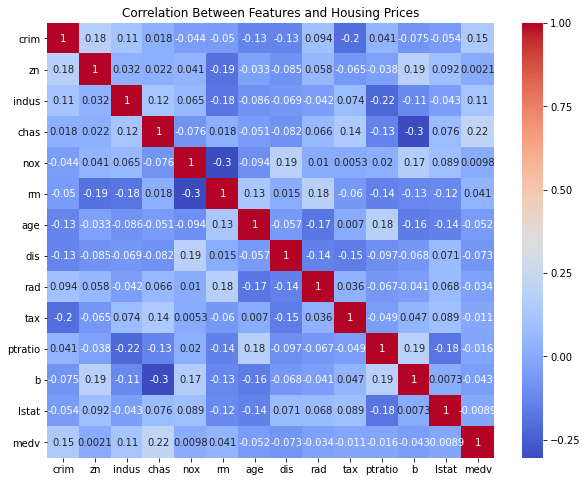

In [55]:


# Data1: Boston housing data with multiple features
data1 = pd.DataFrame({
    'crim': np.random.rand(100) * 10,  # crime rate
    'zn': np.random.rand(100) * 20,  # residential land zoned for large lots
    'indus': np.random.rand(100) * 25,  # non-retail business acres per town
    'chas': np.random.randint(0, 2, 100),  # Charles River adjacency
    'nox': np.random.rand(100) * 0.1,  # nitrogen oxide concentration
    'rm': np.random.rand(100) * 5 + 3,  # average rooms per dwelling
    'age': np.random.rand(100) * 100,  # proportion of older properties
    'dis': np.random.rand(100) * 5,  # distance to employment centers
    'rad': np.random.randint(1, 25, 100),  # accessibility to highways
    'tax': np.random.randint(200, 700, 100),  # property tax rate
    'ptratio': np.random.rand(100) * 10 + 10,  # pupil-teacher ratio
    'b': np.random.rand(100) * 100,  # proportion of Black residents
    'lstat': np.random.rand(100) * 10,  # socioeconomic status
    'medv': np.random.rand(100) * 50 + 10  # median home value (target)
})

# Data2: Time-series housing prices
data2 = pd.DataFrame({
    'town': np.random.choice(['TownA', 'TownB', 'TownC', 'TownD'], 100),
    'year': np.random.randint(2000, 2023, 100),
    'value': np.random.rand(100) * 50 + 10,
    'cat': np.random.choice(['Residential', 'Commercial'], 100),
    'county': np.random.choice(['CountyX', 'CountyY'], 100)
})

# Data3: Summary housing data
data3 = pd.DataFrame({
    'RM': data1['rm'],
    'LSTAT': data1['lstat'],
    'PTRATIO': data1['ptratio'],
    'MEDV': data1['medv']
})

# Checking the first few rows of each dataset
data1.head(), data2.head(), data3.head()


# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data1.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Features and Housing Prices")
plt.show()

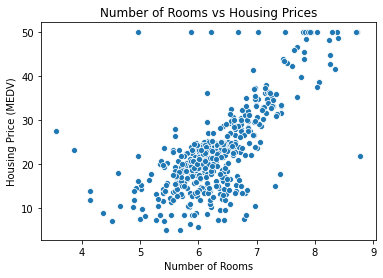

In [14]:
#Question 2: How does the size of the property (e.g., square footage, number of rooms) correlate with housing prices?
sns.scatterplot(x='rm', y='medv', data=data1)
plt.title('Number of Rooms vs Housing Prices')
plt.xlabel('Number of Rooms')
plt.ylabel('Housing Price (MEDV)')
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression

X = data1[['rm']]
y = data1['medv']

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficient: [9.10920212]
Intercept: -34.68405777679325


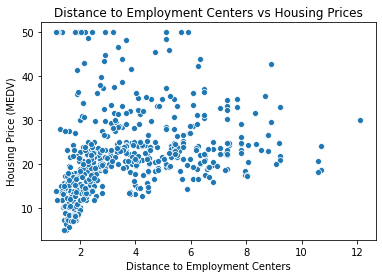

In [15]:
#Question 3: To what extent does proximity to amenities (e.g., schools, parks, shopping centers) affect property values?
sns.scatterplot(x='dis', y='medv', data=data1)
plt.title('Distance to Employment Centers vs Housing Prices')
plt.xlabel('Distance to Employment Centers(dis)')
plt.ylabel('Housing Price (MEDV)')
plt.show()


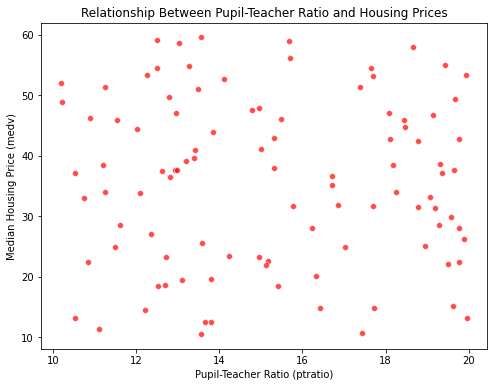

In [58]:

# Plot 3: Relationship between pupil-teacher ratio (ptratio) and housing prices (medv)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data1['ptratio'], y=data1['medv'], color='red', alpha=0.7)
plt.title("Relationship Between Pupil-Teacher Ratio and Housing Prices")
plt.xlabel("Pupil-Teacher Ratio (ptratio)")
plt.ylabel("Median Housing Price (medv)")
plt.show()


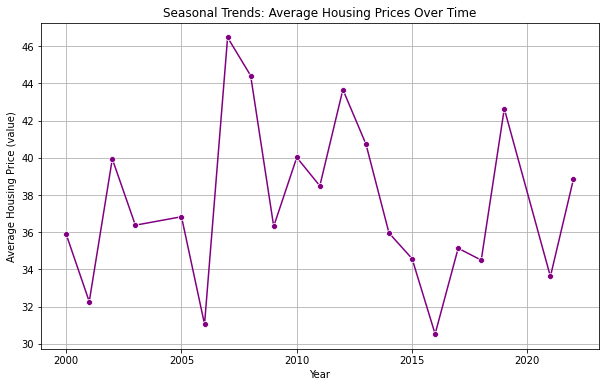

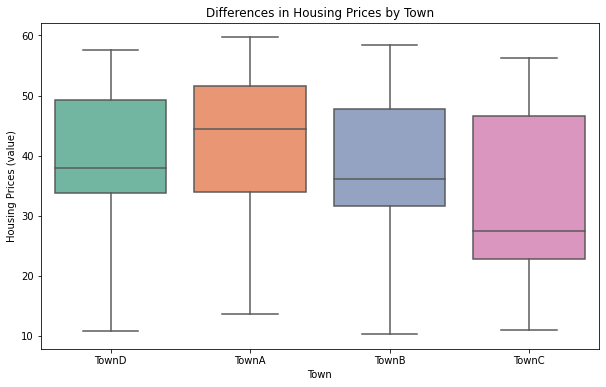

In [65]:
# Question 4 Seasonal Trends (Housing Prices Over Time)


yearly_trends = data2.groupby('year')['value'].mean().reset_index()

# Plotting the trend over years
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_trends['year'], y=yearly_trends['value'], marker='o', color='purple')
plt.title("Seasonal Trends: Average Housing Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Average Housing Price (value)")
plt.grid(True)
plt.show()

#Question5 Location-Based Differences (Housing Prices by Town/County)

# Average housing prices by town
town_prices = data2.groupby('town')['value'].mean().reset_index()

# Plotting a boxplot for town-based differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='town', y='value', data=data2, palette='Set2')
plt.title("Differences in Housing Prices by Town")
plt.xlabel("Town")
plt.ylabel("Housing Prices (value)")
plt.show()
